## Marketing exercises: Pandas Recap

In [1]:
import pandas as pd

df = pd.read_excel('LiquidLaundry.xlsx')
df = df.drop(['Set'], axis = 1)
df

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Choice
0,1,9,11,0.00,4.67,0,0,1,0,0,1
1,1,9,11,0.62,4.98,0,0,0,1,0,0
2,1,9,11,0.31,5.38,0,0,0,0,1,0
3,1,9,11,0.00,4.98,0,0,0,0,0,0
4,2,9,29,0.00,4.67,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1387,347,289,32,0.43,4.22,0,0,0,0,0,1
1388,348,289,37,0.00,5.28,0,0,1,0,0,0
1389,348,289,37,0.43,4.89,0,0,0,1,0,0
1390,348,289,37,0.14,4.92,0,0,0,0,1,0


1. Verify that there are 52 households and 348 purchase occasions

In [2]:
# df['Household'].nunique()
# df['Occasion'].nunique()
df2 = pd.DataFrame({'' : ['Household', 'Orders'], 'Num': [df['Household'].nunique(), df['Occasion'].nunique()]})

df2.head()

,,Num
0,Household,52
1,Orders,348


2. Regardless of brand, determine overall average price and percentage of time brands were on feature and on display.

In [3]:
a = df['Price'].mean()
b = df['Feature'].sum() / 1391
c = df['Display'].sum() / 1391

df3 = pd.DataFrame({'' : ['Price', 'Feature', 'Display'], 'mean': [a, b, c]})
df3

,,mean
0,Price,5.404555
1,Feature,0.062545
2,Display,0.097771


3. Create a new column “Brand” reporting a 1-3 number representing the brand relevant for each observation (1=Tide, 2=Wisk, 3=Era).

In [4]:
df['Brand'] = df[['Tide', 'Wisk', 'Era']].idxmax(axis=1).apply(lambda x: {'Tide': 1, 'Wisk': 2, 'Era': 3}[x])
df

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Choice,Brand
0,1,9,11,0.00,4.67,0,0,1,0,0,1,1
1,1,9,11,0.62,4.98,0,0,0,1,0,0,2
2,1,9,11,0.31,5.38,0,0,0,0,1,0,3
3,1,9,11,0.00,4.98,0,0,0,0,0,0,1
4,2,9,29,0.00,4.67,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,347,289,32,0.43,4.22,0,0,0,0,0,1,1
1388,348,289,37,0.00,5.28,0,0,1,0,0,0,1
1389,348,289,37,0.43,4.89,0,0,0,1,0,0,2
1390,348,289,37,0.14,4.92,0,0,0,0,1,0,3


4. Compute the market share for each brand in this dataset

In [6]:
brand_counts = df[df['Choice'] == 1].groupby('Brand')['Choice'].sum()
print(brand_counts)

Brand
1    127
2    179
3     42
Name: Choice, dtype: int64


5. Compute average price and feature/display frequency, separately for each brand

In [9]:
brand_metrics = df.groupby('Brand').agg({'Price': 'mean', 'Feature': 'mean', 'Display': 'mean'})
brand_metrics

,Price,Feature,Display
Brand,,,
1,5.505216,0.060345,0.091954
2,4.651897,0.103448,0.175287
3,5.955891,0.025862,0.031609


6. Plot purchases per week (entire year):

In [13]:
import matplotlib.pyplot as plt
purchase = df[df['Choice'] == 1].groupby('Week')['Choice'].sum()

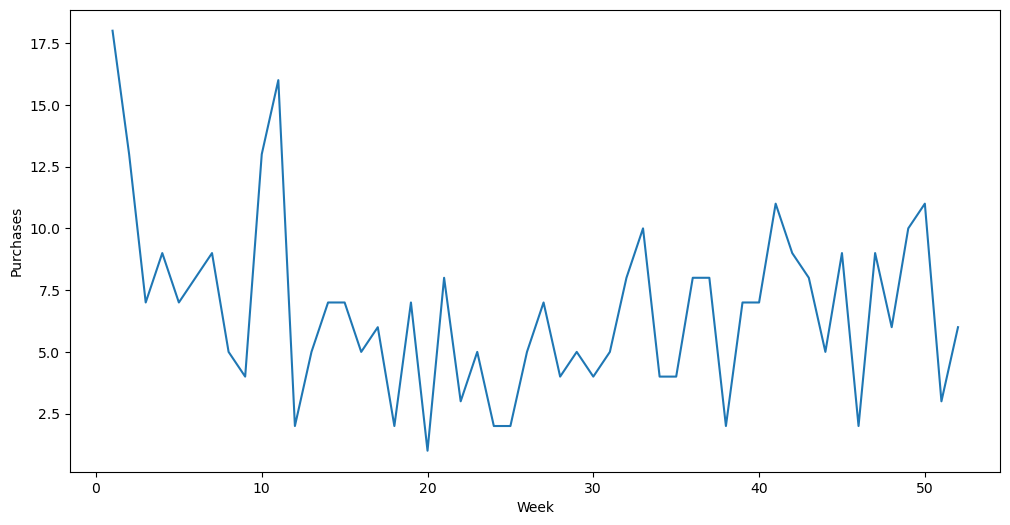

In [18]:
plt.figure(figsize=(12, 6))
purchase.plot(kind= 'line')
plt.xlabel('Week')
plt.ylabel('Purchases')
plt.show()